<a href="https://colab.research.google.com/github/hzarei4/pymc_tests/blob/main/GlobularCluster_Assessment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install eleanor >/dev/null
import eleanor
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 15
import warnings
warnings.filterwarnings('ignore')
from astropy.coordinates import SkyCoord  
import astropy.units as u
from IPython.display import Image
import astropy

In [ ]:
#!curl -O https://archive.stsci.edu/missions/tess/download_scripts/sector/tesscurl_sector_52_ffic.sh

# m13
#!curl -C - -L -o s52_12.fits https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2022140011850-s0052-1-2-0224-s_ffic.fits

#ngc 5139 omega cent
#!curl -O https://archive.stsci.edu/missions/tess/download_scripts/sector/tesscurl_sector_38_ffic.sh
!curl -C - -L -o omegacent.fits https://mast.stsci.edu/api/v0.1/Download/file/?uri=mast:TESS/product/tess2021120201905-s0038-2-4-0209-s_ffic.fits


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.9M  100 33.9M    0     0  16.3M      0  0:00:02  0:00:02 --:--:-- 16.3M


In [ ]:
from astroquery.gaia import Gaia
Gaia.MAIN_GAIA_TABLE = "gaiadr3.gaia_source" 



Gaia.ROW_LIMIT = -1
coord = SkyCoord(ra=201.69121, dec=-47.47686, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(60, u.arcmin)
height = u.Quantity(60, u.arcmin)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


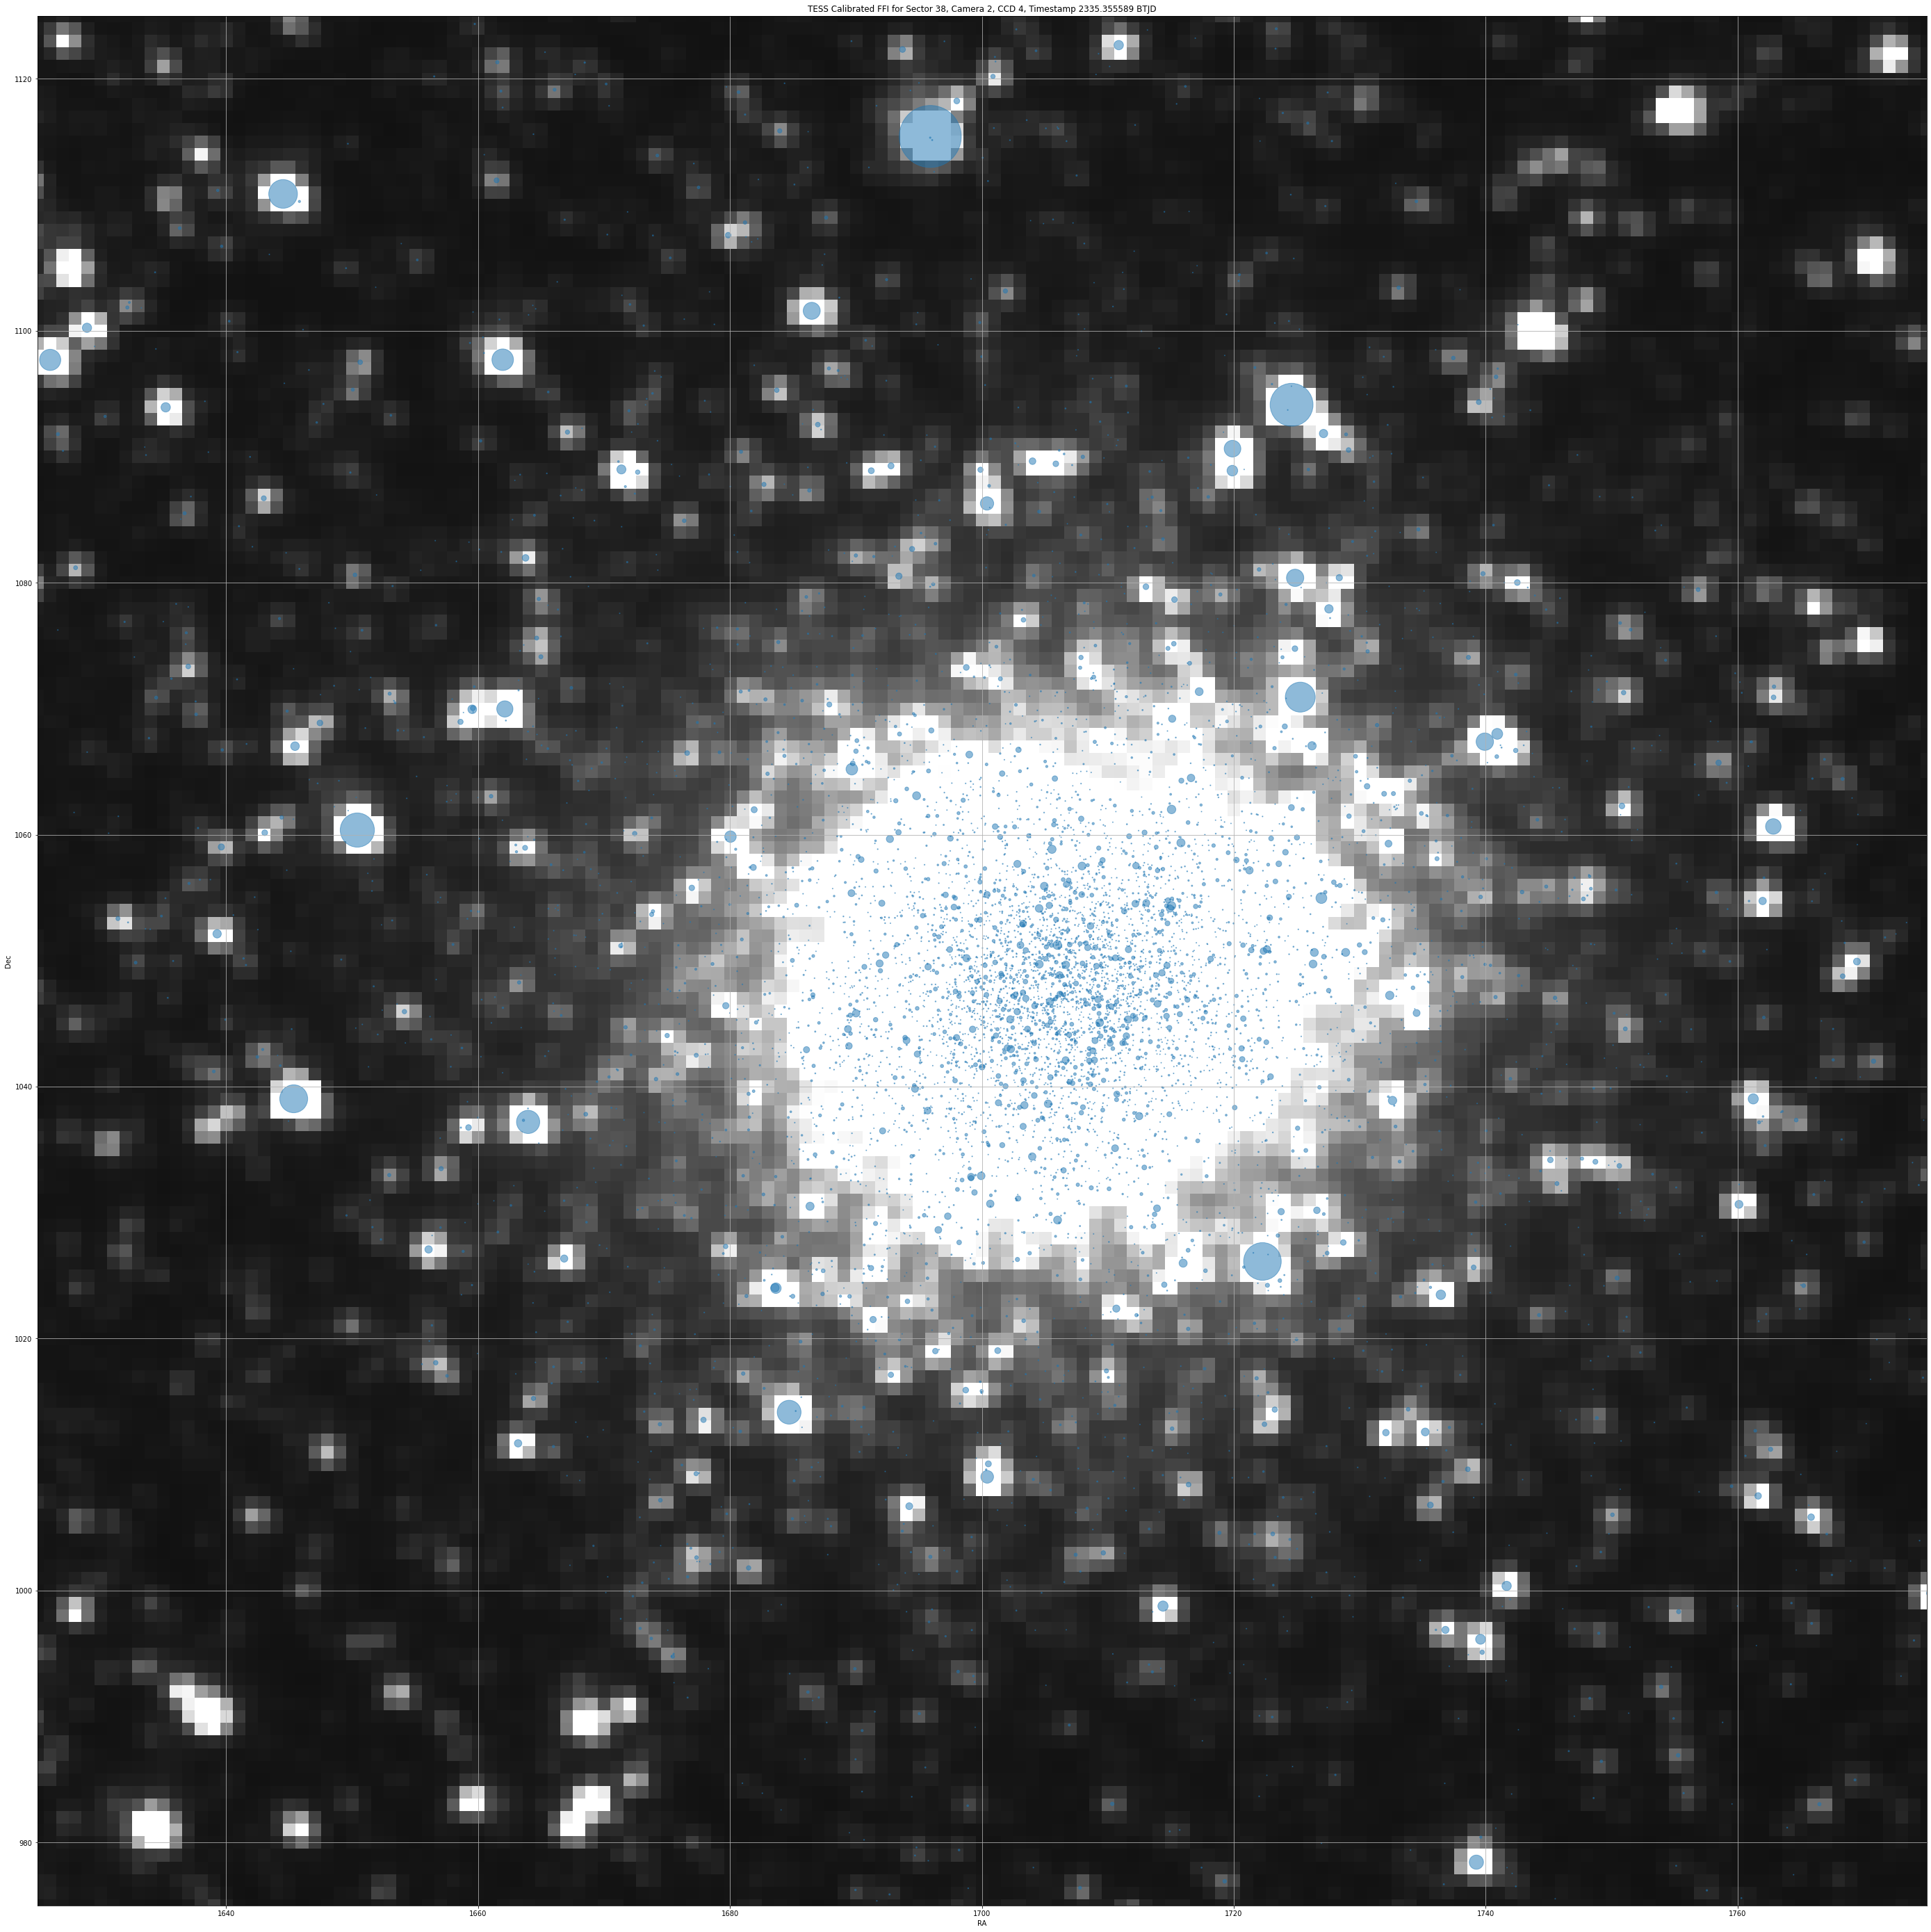

In [ ]:
from astropy.io import fits
from astropy.wcs import WCS

fits_file = "/content/omegacent.fits"


r_filtered = r[r['phot_g_mean_mag']<15.0]



with fits.open(fits_file, mode = "readonly") as hdulist:
    wcs_info = WCS(hdulist[1].header)
    cal_image = hdulist[1].data
    header = hdulist[1].header

x1, y1 = wcs_info.all_world2pix(r_filtered["ra"].value, r_filtered["dec"].value, 0)



mid_time = (header['TSTOP'] + header['TSTART']) / 2


plt.figure(figsize = (50, 50))

plt.subplot(111)#, projection = wcs_info)
plt.grid()
plt.imshow(cal_image, vmin = np.percentile(cal_image,1),vmax = np.percentile(cal_image, 99.0),origin = "lower", cmap='gray')

plt.scatter(x1, y1, marker="o", s=10**(4*(np.max(r_filtered["phot_g_mean_mag"].value)-r_filtered["phot_g_mean_mag"].value)/np.min(r_filtered["phot_g_mean_mag"].value)), 
            alpha=0.5)
ax = plt.axes()
plt.xlabel('RA')
plt.ylabel('Dec')
ax.set_xlim([1625,1775])
ax.set_ylim([975, 1125])

plt.title("TESS Calibrated FFI for Sector 38, Camera 2, CCD 4, Timestamp %f BTJD" % mid_time);


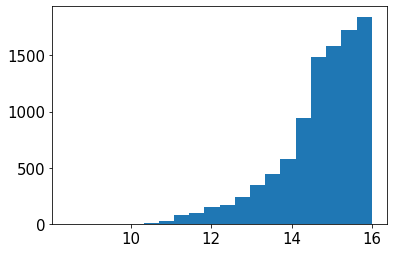

In [ ]:

plt.hist(t["phot_g_mean_mag"].value, bins=20);

In [ ]:
"""
SELECT TOP 200000 gaia_source.source_id,gaia_source.ra,gaia_source.dec,gaia_source.phot_g_mean_mag
FROM gaiadr3.gaia_source 
WHERE 
CONTAINS(
	POINT('ICRS',gaiadr3.gaia_source.ra,gaiadr3.gaia_source.dec),
	CIRCLE('ICRS',201.69121,-47.47686,0.16666666666666666)
)=1  AND  (gaiadr3.gaia_source.phot_g_mean_mag<=16)
""";
Gaia.ROW_LIMIT = -1
coord = SkyCoord(ra=201.69121, dec=-47.47686, unit=(u.degree, u.degree), frame='icrs')
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

r_filtered = r[r['phot_g_mean_mag']<16.0]

r_filtered.pprint(max_lines=12, max_width=130)

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
         dist             solution_id             DESIGNATION          ... ebpminrp_gspphot_upper libname_gspphot
                                                                       ...          mag                          
--------------------- ------------------- ---------------------------- ... ---------------------- ---------------
0.0005948824381837613 1636148068921376768 Gaia DR3 6083701813360721536 ...                     --                
0.0008304785920241705 1636148068921376768 Gaia DR3 6083701813360724096 ...                     --                
0.0008331888445032994 1636148068921376768 Gaia DR3 6083701813385802368 ...                     --                
                  ...                 ...                          ... ...                    ...             ...
  0.05897441339820015 1636148068921376768 Gaia DR3 6083698480491172864 ...                     --                
 0.059074389686860344 1636148068921376